In [61]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

## Introduction and Learning Goals

In this lab, we will explore classification using the K-Nearest Neighbors approach. We will use a customer churn dataset from the telecom industry, which includes customer data such as long-distance usage, data usage, monthly revenue, types of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, includes several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data includes a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing. Then we will use K-nearest neighbors to predict customer churn rates.

After completing this lab, you should have a working understanding of how to preprocess a variety of variables to apply the K-Nearest Neighbors algorithm, understand how to choose K, and understand how to evaluate model performance.


## Question 1

* We begin by importing the data. Examine the columns and data.
* Notice that the data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.
* Begin by taking an initial look at the data, including both numeric and non-numeric features.


In [62]:
### BEGIN SOLUTION

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")
round(df.describe(),2)
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


## Question 2

* Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric.  The non-numeric features will need to be encoded using methods we have discussed in the course.
* Start by identifying the number of unique values each variable takes, then create list variables for categorical, numeric, binary, and ordinal variables.
* Note that the variable 'months' can be treated as numeric, but it may be more convenient to transform it to an ordinal variable.
* For the other categorical variables, examine their values to determine which may be encoded ordinally.


In [63]:
numeric = []
ordinal = []
categorical = []
for col in df.columns:
  if df[col].nunique() > 5:
    numeric.append(col)
  elif df[col].nunique() > 2 and df[col].nunique() < 5:
    categorical.append(col)
  elif df[col].nunique() <= 2 :
    ordinal.append(col)

# # numeric = [x for x in df.columns if df[x]]
# df["months"].nunique() > 5
numeric

['gb_mon', 'monthly']

In [64]:
# #Run only once
# ordinal.append("monthly")
# numeric.remove("")

In [65]:
df[ordinal].nunique()

multiple                     2
security                     2
backup                       2
protection                   2
support                      2
unlimited                    2
paperless                    2
churn_value                  2
payment_Credit Card          2
payment_Mailed Check         2
internet_type_DSL            2
internet_type_Fiber Optic    2
internet_type_None           2
offer_Offer A                2
offer_Offer B                2
offer_Offer C                2
offer_Offer D                2
offer_Offer E                2
dtype: int64

array([[<Axes: title={'center': 'gb_mon'}>,
        <Axes: title={'center': 'monthly'}>]], dtype=object)

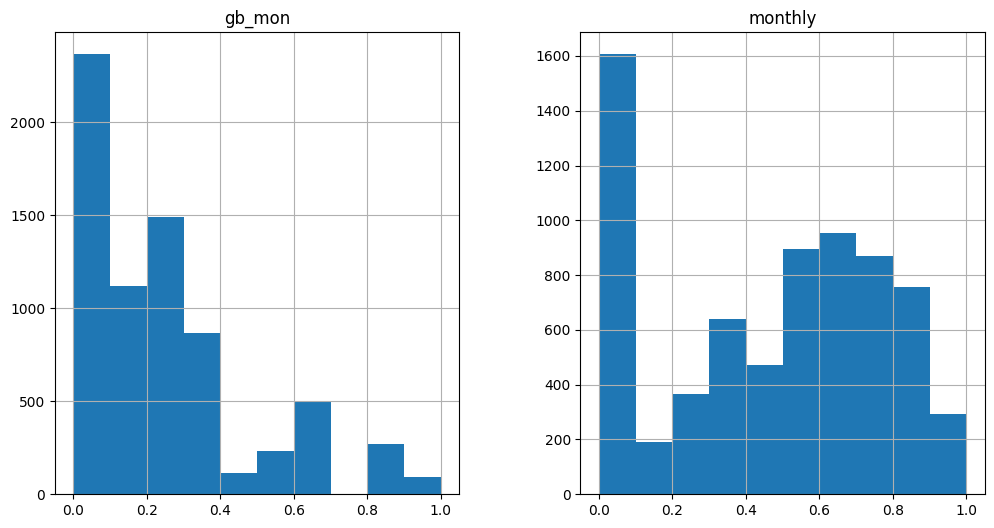

In [66]:
df[numeric].hist(figsize=(12, 6))

## Question 3
* Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
* Scale the data using one of the scaling methods discussed in the course.
* Save the processed dataframe as a comma-separated file: 'churndata_processed.csv'


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


for column in [ordinal + numeric]:
  df[column] = scaler.fit_transform(df[column])

In [68]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.434,0.398,0.0,0.000,0.250,0.750,1.0
multiple,7043.0,0.422,0.494,0.0,0.000,0.000,1.000,1.0
gb_mon,7043.0,0.241,0.240,0.0,0.035,0.200,0.318,1.0
security,7043.0,0.287,0.452,0.0,0.000,0.000,1.000,1.0
backup,7043.0,0.345,0.475,0.0,0.000,0.000,1.000,1.0
protection,7043.0,0.344,0.475,0.0,0.000,0.000,1.000,1.0
support,7043.0,0.290,0.454,0.0,0.000,0.000,1.000,1.0
unlimited,7043.0,0.674,0.469,0.0,0.000,1.000,1.000,1.0
contract,7043.0,0.377,0.424,0.0,0.000,0.000,1.000,1.0
paperless,7043.0,0.592,0.491,0.0,0.000,1.000,1.000,1.0


## Question 4
* Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value).
* Split the sample into training and test samples, with the test sample representing 40% of observations.
* Estimate a K-Nearest Neighbors model, using K=3.
* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
* Use a graphic to illustrate the Confusion Matrix.


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


X = df.drop("churn_value",axis="columns")
y = df["churn_value"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.4)

In [73]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


def evaluate_classification(true_labels, predicted_labels):
    """
    Evaluate a classification model and return precision, recall, F1-score, and accuracy.

    Parameters:
    - true_labels: Actual true labels
    - predicted_labels: Predicted labels by the model

    Returns:
    - precision: Precision score
    - recall: Recall score
    - f1: F1-score
    - accuracy: Accuracy score
    """
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)

    return precision, recall, f1, accuracy


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels):
    """
    Plot a graphical representation of the confusion matrix.

    Parameters:
    - true_labels: Actual true labels
    - predicted_labels: Predicted labels by the model
    - class_labels: Labels for the classes (e.g., ['Class 0', 'Class 1'])

    Returns:
    - None (displays the confusion matrix plot)
    """
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()





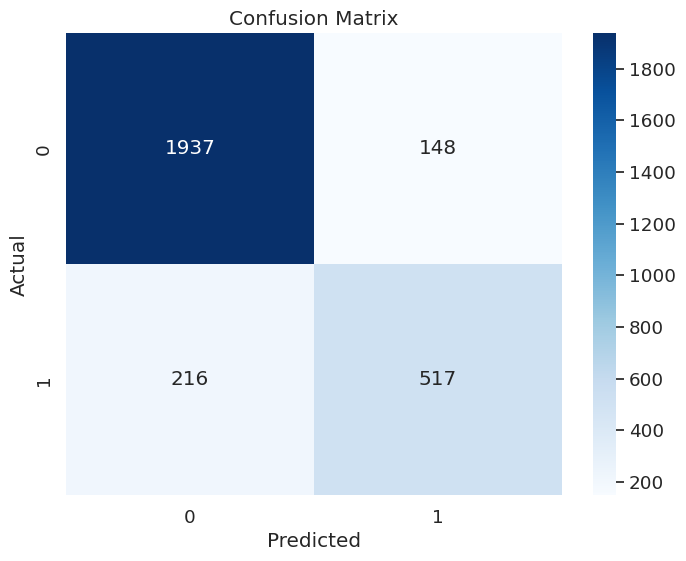

The precision is 0.7774436090225564 
 The recall is 0.7053206002728513 
 The f1 score is 0.7396280400572245 
 The accuracy is 0.8708303761533002 


In [83]:
precision, recall, f1, accuracy = evaluate_classification(y_test, predictions)
plot_confusion_matrix(y_test, predictions)

print("The precision is {} \n The recall is {} \n The f1 score is {} \n The accuracy is {} ".format(precision, recall, f1, accuracy))


## Question 5
* Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
* This time, use K=5 and weight the results by distance.
* Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix.


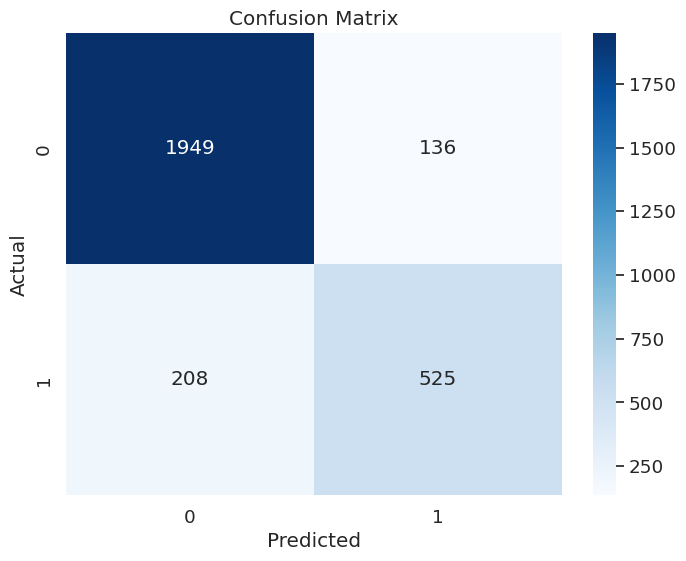

The precision is 0.794251134644478 
 The recall is 0.7162346521145976 
 The f1 score is 0.7532281205164992 
 The accuracy is 0.8779276082327893 


In [84]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

precision, recall, f1, accuracy = evaluate_classification(y_test, predictions)
plot_confusion_matrix(y_test, predictions)

print("The precision is {} \n The recall is {} \n The f1 score is {} \n The accuracy is {} ".format(precision, recall, f1, accuracy))


## Question 6
* To determine the right value for K, examine results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
* Generate charts which plot each of these measures as a function of K.
* What do these charts suggest about the optimal value for K?


In [86]:
def f1_error_rate_score(true, predictions):
    f1 = f1_score(true, predictions)
    error_rate = 1-round(accuracy_score(true, predictions), 4)

    return f1, error_rate

In [88]:
f1_scores = []
error_rates =[]

for i in range(1,41):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  f1, error_rate = f1_error_rate_score(y_test, predictions)
  f1_scores.append(f1)
  error_rates.append(error_rate)

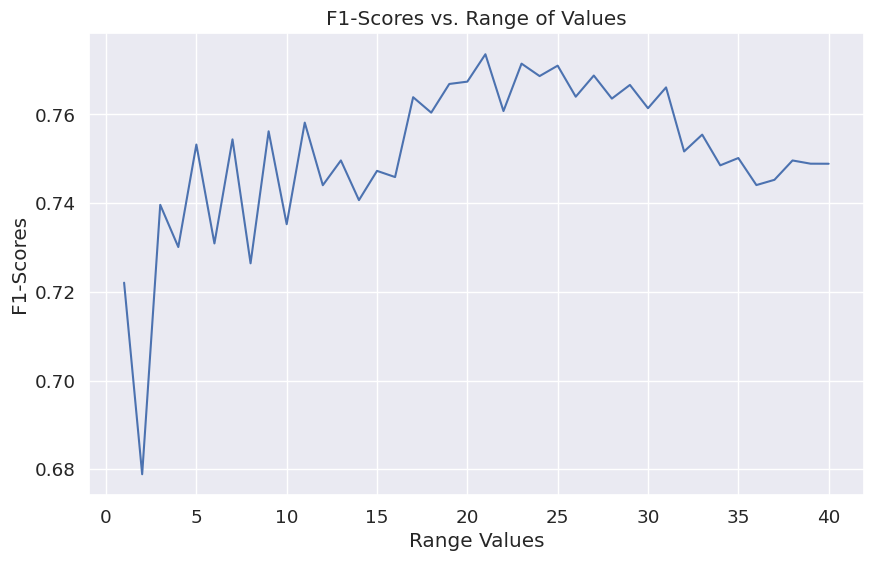

In [91]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(range(1,41), f1_scores, marker='', linestyle='-')
plt.title('F1-Scores vs. Range of Values')
plt.xlabel('Range Values')
plt.ylabel('F1-Scores')
plt.grid(True)  # Add a grid for better readability

# Show the plot
plt.show()



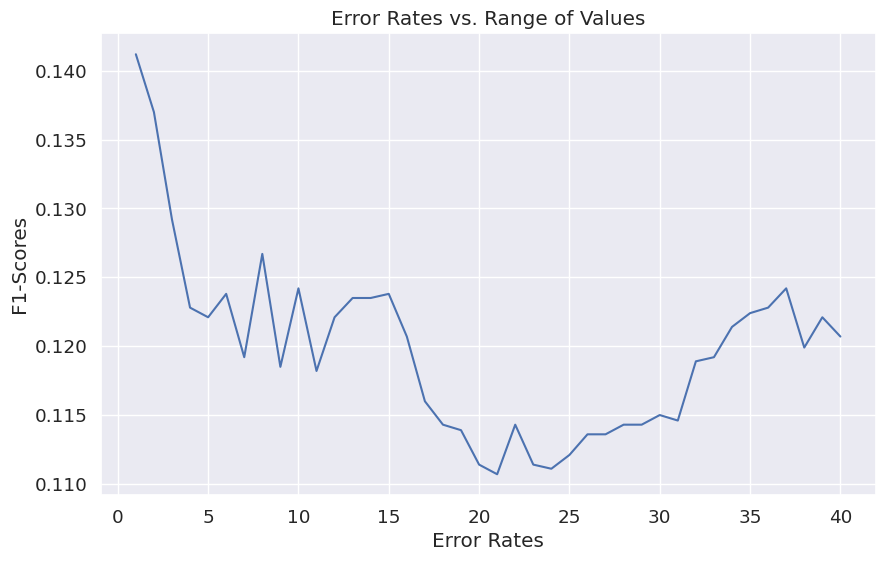

In [92]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(range(1,41), error_rates , marker='', linestyle='-')
plt.title('Error Rates vs. Range of Values')
plt.xlabel('Error Rates')
plt.ylabel('F1-Scores')
plt.grid(True)  # Add a grid for better readability

# Show the plot
plt.show()

